## Importing Important libraries

In [6]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization

import warnings
warnings.filterwarnings("ignore")

In [2]:
meta_data = pd.read_csv("/kaggle/input/skin-cancer-dataset/HAM10000_metadata.csv")
meta_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [7]:
print("Unique Cancer types represented in data.")
print(meta_data.dx.unique(),"\n")

# Handling categorical data
encoder = LabelEncoder()
meta_data["dx_label"] = encoder.fit_transform(meta_data["dx"])

# Display of labels and their integer encoding
print("Cancer types and their integer encoding")
print(encoder.classes_)
print(encoder.transform(encoder.classes_))

Unique Cancer types represented in data.
['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec'] 

Cancer types and their integer encoding
['akiec' 'bcc' 'bkl' 'df' 'mel' 'nv' 'vasc']
[0 1 2 3 4 5 6]


In [8]:
meta_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dx_label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2


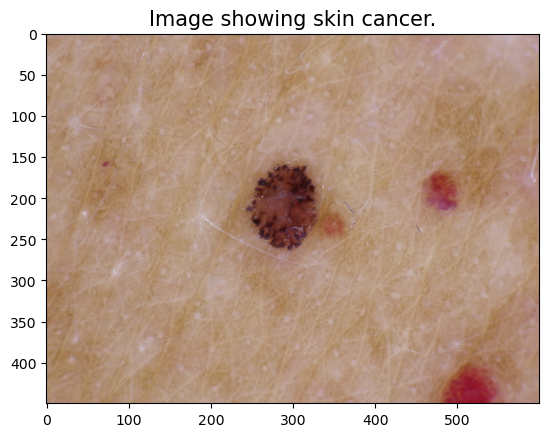

In [9]:
image = "/kaggle/input/skin-cancer-dataset/Skin Cancer/Skin Cancer/ISIC_0032258.jpg"
sample_image = cv2.imread(image)[:,:,::-1] # Square brackets corrects image color
plt.title("Image showing skin cancer.", fontsize= 15)
plt.imshow(sample_image);

## Data Preprocessing & Augmentation

In [10]:
# New image size variable declaration
IMG_SIZE = 250
# depth = 7, which is how long the one-hot-encoding array for each y-label should be.
depth = len(encoder.classes_)

# Data Sorting process.
images_dir = r"/kaggle/input/skin-cancer-dataset/Skin Cancer/Skin Cancer"

X = [] # Dictionary to contain arrays/tensors of images.
Y = [] # Dictionary to contain names of cancer types.

for item in os.scandir(images_dir):
  # Getting name of each individual image.
  image_name = item.name
  # Reading each image tensor, resizing, converting to array and appending it to array X.
  image = Image.open(images_dir+"/"+image_name)
  image = image.resize((IMG_SIZE, IMG_SIZE))
  image = np.array(image)
  # TO improve model accuracy in future, explore adding normalization layer her. 
  X.append(image)
  # Getting corresponding cancer type from meta_data and appending to Y.
  cancer_type = meta_data.dx_label[meta_data.image_id == image_name.split(".")[0]]
  # Converting Labels to one hot encoding matrix.
  cancer_type = tf.one_hot(cancer_type, depth)
  Y.append(cancer_type)

In [11]:
# Converting both arrays to numpy arrays.
X = np.array(X)
y = np.squeeze(np.array(Y))

print("Images Current shape.")
print(X.shape)
print("The current Label shape is")
print(y.shape)

Images Current shape.
(10015, 250, 250, 3)
The current Label shape is
(10015, 7)


## Model Training

In [ ]:
# Defining model architecture
model = Sequential()

# Layer one
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size= (3,3), input_shape= (250, 250, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size= (2,2)))

# Layer two
model.add(Conv2D(32, kernel_size= (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size= (2,2)))

# Layer three
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# Layer four
model.add(Dense(depth))
model.add(Activation("softmax"))


# Compiling model
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"],
)

# model.summary()
# fitting/training model
model.fit(X, y, batch_size= 32, validation_split= 0.1, epochs= 10, verbose = 1)

Epoch 1/10
 28/282 [=>............................] - ETA: 12:22 - loss: 1.8366 - accuracy: 0.6317